In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
data = pd.read_excel("project.xlsx")
data.head()
data.tail()

,Academic Year,Grade,Average Mark,type,Extra Curricular,Study Hours,Attendance
7,2016,8,79,CBSE,Yes,2,82
8,2017,9,94,STATE,Yes,2,90
9,2018,10,80,STATE,Yes,3,88
10,2019,11,66,STATE,Yes,3,85
11,2020,12,70,STATE,Yes,3,91


In [98]:
data.describe()

,Academic Year,Grade,Average Mark,Study Hours,Attendance
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2014.500000,6.500000,76.083333,1.833333,84.250000
std,3.605551,3.605551,12.116543,0.834847,9.225705
min,2009.000000,1.000000,61.000000,1.000000,65.000000
25%,2011.750000,3.750000,66.000000,1.000000,81.000000
50%,2014.500000,6.500000,74.500000,2.000000,86.500000
75%,2017.250000,9.250000,88.500000,2.250000,90.250000
max,2020.000000,12.000000,94.000000,3.000000,95.000000


In [101]:
def safe_binary_map(data, column, mapping):
    if data[column].dtype == 'object':
        data[column] = data[column].str.strip().str.capitalize()
        data[column] = data[column].map(mapping)


In [100]:
safe_binary_map(data, 'Extra Curricular', {'Yes': 1, 'No': 0})


In [102]:
data.head()

,Academic Year,Grade,Average Mark,type,Extra Curricular,Study Hours,Attendance
0,2009,1,90,CBSE,0,1,90
1,2010,2,88,CBSE,0,1,93
2,2011,3,90,CBSE,0,1,95
3,2012,4,63,CBSE,0,1,84
4,2013,5,66,CBSE,0,1,65


In [103]:
data.tail()

,Academic Year,Grade,Average Mark,type,Extra Curricular,Study Hours,Attendance
7,2016,8,79,CBSE,1,2,82
8,2017,9,94,STATE,1,2,90
9,2018,10,80,STATE,1,3,88
10,2019,11,66,STATE,1,3,85
11,2020,12,70,STATE,1,3,91


In [104]:
data.tail()

,Academic Year,Grade,Average Mark,type,Extra Curricular,Study Hours,Attendance
7,2016,8,79,CBSE,1,2,82
8,2017,9,94,STATE,1,2,90
9,2018,10,80,STATE,1,3,88
10,2019,11,66,STATE,1,3,85
11,2020,12,70,STATE,1,3,91


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Academic Year     12 non-null     int64 
 1   Grade             12 non-null     int64 
 2   Average Mark      12 non-null     int64 
 3   type              12 non-null     object
 4   Extra Curricular  12 non-null     int64 
 5   Study Hours       12 non-null     int64 
 6   Attendance        12 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 804.0+ bytes


In [106]:
data['type'].unique()

array(['CBSE', 'STATE'], dtype=object)

In [107]:
if data['type'].dtype == 'object':
    data['type'] = data['type'].str.strip().str.upper()
    data['type'] = data['type'].replace({'CBES': 'CBSE'})  # Just in case
    data['type'] = data['type'].map({'STATE': 0, 'CBSE': 1})


In [108]:
data.tail()

,Academic Year,Grade,Average Mark,type,Extra Curricular,Study Hours,Attendance
7,2016,8,79,1,1,2,82
8,2017,9,94,0,1,2,90
9,2018,10,80,0,1,3,88
10,2019,11,66,0,1,3,85
11,2020,12,70,0,1,3,91


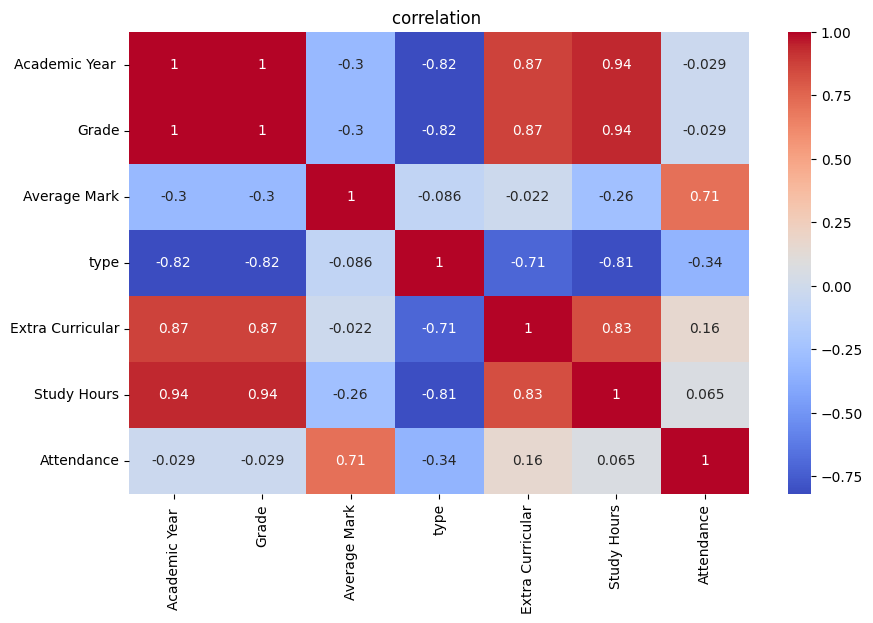

In [109]:
plt.figure(figsize=(10,6,))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title("correlation ")
plt.show()

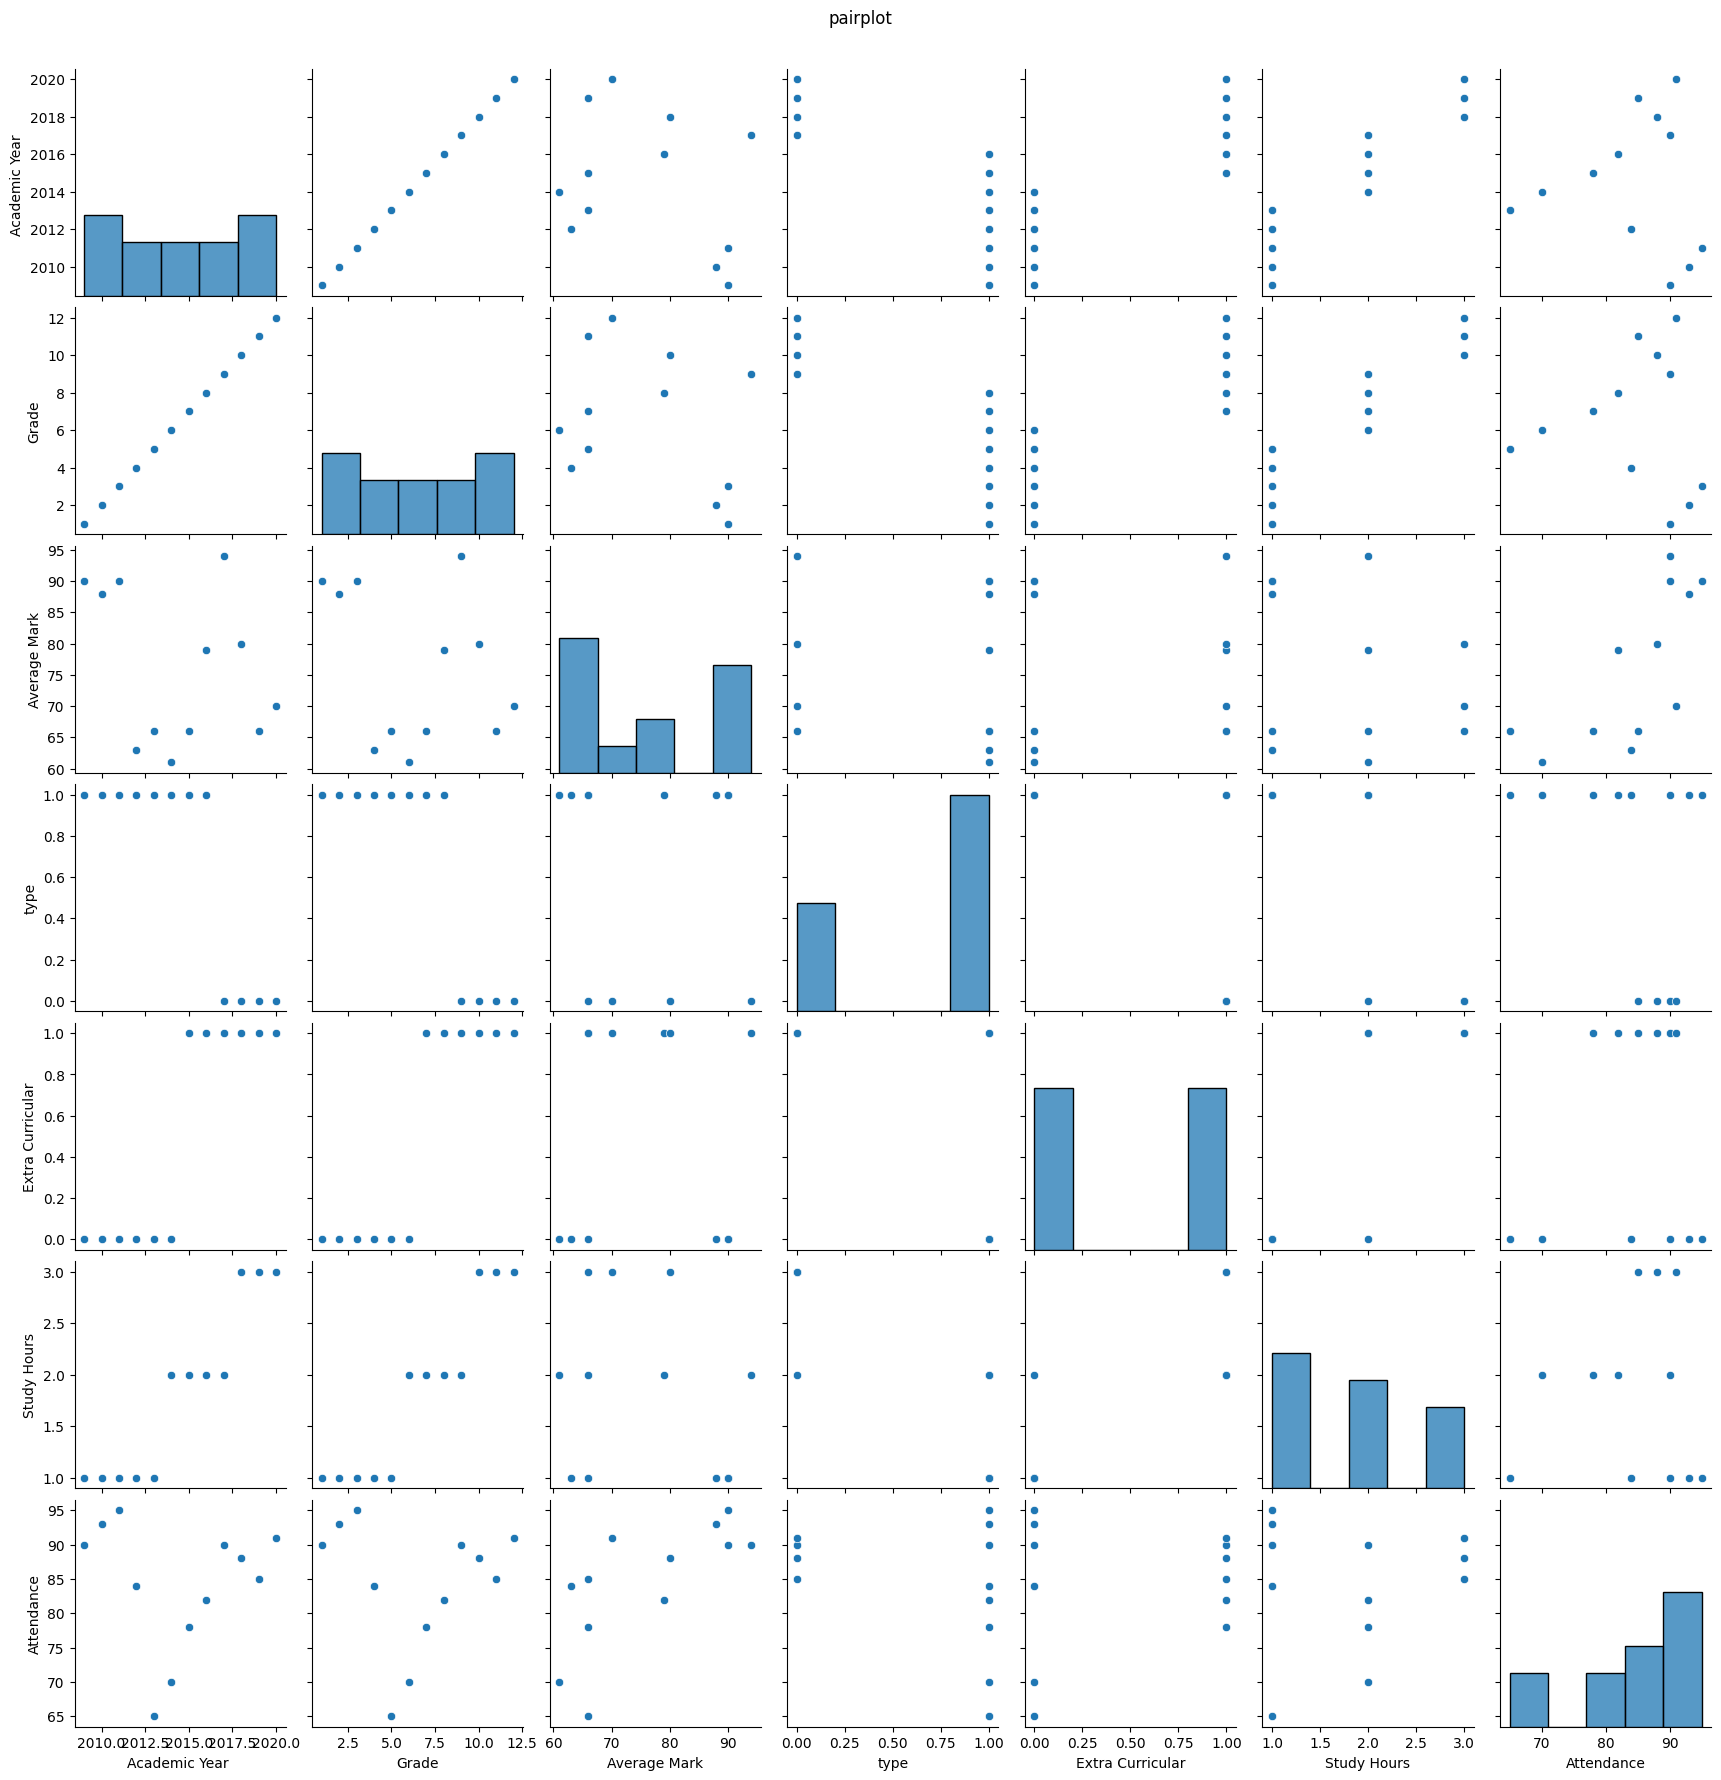

In [110]:
sns.pairplot(data)
plt.suptitle("pairplot",y=1.02)
plt.show()

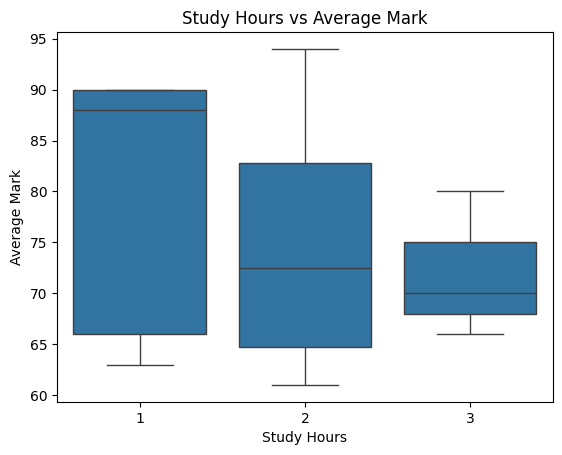

In [111]:
sns.boxplot(x="Study Hours", y="Average Mark", data=data)
plt.title("Study Hours vs Average Mark")
plt.show()


In [112]:
correlation = data.corr()

# Show correlations with target only
print(correlation['Average Mark'].sort_values(ascending=False))


Average Mark        1.000000
Attendance          0.708959
Extra Curricular   -0.021550
type               -0.086351
Study Hours        -0.259129
Grade              -0.300694
Academic Year      -0.300694
Name: Average Mark, dtype: float64


In [113]:
X = data[['Attendance','Study Hours','Grade',]]
y = data[['Average Mark']]

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 70.73156452829404
R² Score: 0.26997238445568084
